In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\perry\AppData\Local\Temp\ipykernel_16936\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np

In [3]:
from IPython.display import Image
from graphviz import Digraph

In [4]:
def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

In [5]:
class Node(object):
    def __init__(self, value):
        self.val = value
        self.height = 1
        self.right = None
        self.left = None

In [6]:
#define AVL tree object and methods
class AVL(object):
    def buildBinaryTree(self, nodes):
        if len(nodes) == 0:
            raise ValueError('list is empty')

        return self.binaryTree(nodes, 0, len(nodes) - 1)

    def binaryTree(self, nodes, start, end):
        if start > end:
            return

        middle = (start + end) // 2
        root = Node(nodes[middle])
        root.left = self.binaryTree(nodes, start, middle - 1)
        root.right = self.binaryTree(nodes, middle + 1, end)

        return root
    
    def minValueNode(self, node):
        current = node
        
        # loop down to find the leftmost leaf
        while(current.left is not None):
            current = current.left
 
        return current
    
    ### END OF SUPPLIED CODE ###
    
    #modify search to return node instead
    def findNode(self, nodes, val):
        if val == nodes.val:
            return nodes

        if val < nodes.val:
            if nodes.left == None:
                return False

            return self.findNode(nodes.left, val)

        elif val >= nodes.val:
            if nodes.right == None:
                return False

            return self.findNode(nodes.right, val)
    
    #recursively find first common ancestor of two nodes
    def firstCommonAncestor(self, T, N1, N2):
        #N1 = self.findNode(T, N1)
        #N2 = self.findNode(T, N2)
        
        if T is None: return None

        #if N1 and N2 are less than T, the common ancestor must be in left subtree
        if(T.val > N1.val and T.val > N2.val):
            return self.firstCommonAncestor(T.left, N1, N2)

        #if N1 and N2 are greater than T, the common ancestor must be in right subtree
        if(T.val < N1.val and T.val < N2.val):
            return self.firstCommonAncestor(T.right, N1, N2)

        return T
    
    #recursively get height of subtree from node
    def heightOfNode(self, T):
        if T is None:
            return 0

        L = self.heightOfNode(T.left)
        R = self.heightOfNode(T.right)
        return max(L, R) + 1
    
    #compute balance factor by heights of subtrees
    def balanceFactorOfNode(self, T):
        if T is None: return None
        return self.heightOfNode(T.left) - self.heightOfNode(T.right)
    
    #get balance status of node
    def balanceOfNode(self, T):
        if T is None: return None

        L = self.heightOfNode(T.left)
        R = self.heightOfNode(T.right)

        if (L-R > 1 or L-R < -1): return False
        else: return True
        
    #perform left rotation on node P
    def rotateLeft(self, P):
        #transform nodes
        Q = P.right
        tempNode = Q.left
        Q.left = P
        P.right = tempNode
        
        #update heights
        P.height = self.heightOfNode(P.left) - self.heightOfNode(P.right)
        Q.height = self.heightOfNode(Q.left) - self.heightOfNode(Q.right)

        return Q
    
    #perform right rotation on node P
    def rotateRight(self, P):
        #transform nodes
        Q = P.right
        tempNode = Q.right
        Q.right = P
        P.left = tempNode
        
        #update heights
        P.height = self.heightOfNode(P.left) - self.heightOfNode(P.right)
        Q.height = self.heightOfNode(Q.left) - self.heightOfNode(Q.right)

        return Q
    
    #insert and adjust (sub)tree if necessary
    def insert(self, T, key):
        if not T: return Node(key)
        #recurses through tree, selecting left or right subtree until joining tree as leaf
        elif key < T.val: T.left = self.insert(T.left, key)
        else: T.right = self.insert(T.right, key)
           
        balance = self.balanceFactorOfNode(T) #if balance factor is outside range -1 to 1, rotate (sub)tree to adjust

        if (self.balanceOfNode(T) is False): 
            if balance < -1 and key > T.right.val: #RR 
                return self.rotateLeft(T)
            if balance > 1 and key < T.left.val: #LL 
                return self.rotateRight(T)
            if balance < -1 and key < T.right.val: #RL 
                T.right = self.rotateRight(T.right)
                return self.rotateLeft(T)
            if balance > 1 and key > T.left.val: #LR 
                T.left = self.rotateLeft(T.left)
                return self.rotateRight(T)
        
        T.height = self.heightOfNode(T) #reset node height

        return T
    
    #delete and adjust (sub)tree if necessary
    def delete(self, T, key):
        if T is None: return T
        #recurses through tree, selecting left or right subtree searching for key until joining tree as leaf
        elif key > T.val: T.right = self.delete(T.right, key)
        elif key < T.val: T.left = self.delete(T.left, key)
        else:
            #delete node with 1 or 0 children
            if T.right is None:
                tempNode = T.left
                T = None
                return tempNode
            
            elif T.left is None:
                tempNode = T.right
                T = None
                return tempNode
            
            #delete node with 2 children
            else:
                tempNode = self.minValueNode(T.right) #get the smallest node in right subtree
                T.val = tempNode.val #replace root node with right subtree smallest node
                T.right = self.delete(T.right, tempNode.val) #erase the right subtree smallest node 
        
        if T is None: return T #if the tree had 1 node then return

        balance = self.balanceFactorOfNode(T) #if balance factor is outside range -1 to 1, rotate (sub)tree to adjust
        
        if (self.balanceOfNode(T) is False): 
            if balance > 1 and self.balanceOfNode(T.left) >= 0: #LL
                return self.rotateRight(T)
            if balance < -1 and self.balanceOfNode(T.right) <= 0: #RR
                return self.leftRotation(T)
            if balance > 1 and self.balanceOfNode(T.left) < 0: #LR
                T.left = self.leftRotation(T.left)
                return self.rotateRight(T)
            if balance < -1 and self.balanceOfNode(T.right) > 0: #RL
                T.right = self.rotateRight(T.right)
                return self.leftRotation(T)

        T.height = self.heightOfNode(T) #reset node height

        return T

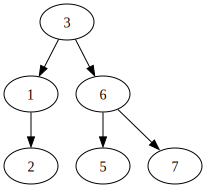

In [7]:
T = AVL() 
data = [1, 2, 3, 5, 6, 7]
tree = T.buildBinaryTree(data) 
dot = visualize_tree(tree)

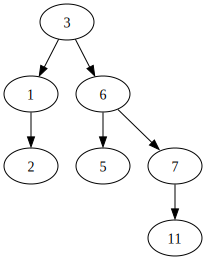

In [8]:
T.insert(tree, 11)
dot = visualize_tree(tree)

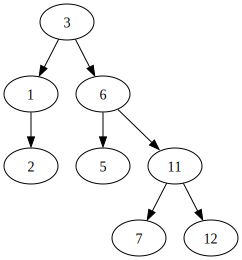

In [9]:
T.insert(tree, 12)
dot = visualize_tree(tree)

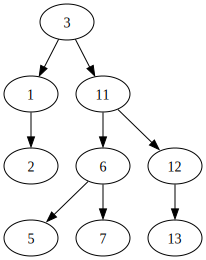

In [10]:
T.insert(tree, 13)
dot = visualize_tree(tree)

In [11]:
T.firstCommonAncestor(tree, T.findNode(tree, 6), T.findNode(tree, 12)).val

11

In [12]:
T.firstCommonAncestor(tree, T.findNode(tree, 2), T.findNode(tree, 6)).val

3

In [13]:
T.firstCommonAncestor(tree, T.findNode(tree, 5), T.findNode(tree, 7)).val

6

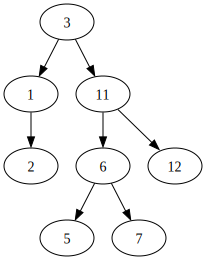

In [14]:
T.delete(tree, 13)
dot = visualize_tree(tree)

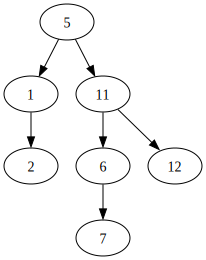

In [15]:
T.delete(tree, 3)
dot = visualize_tree(tree)

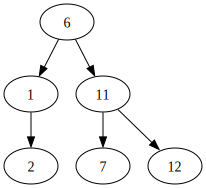

In [16]:
T.delete(tree, 5)
dot = visualize_tree(tree)